In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [50]:
df_total = pd.DataFrame()

for i in range(17):    
    b = bioinfo.gen_df2(df['Species'][i],df['Sequence'][i],3)
    y = np.empty(len(b.index))
    y[:] = i
    b['label'] = y
    b.reset_index(drop=True, inplace=True)
    df_total.reset_index(drop=True, inplace=True)
    df_total = pd.concat([df_total,b], axis=0)   


In [54]:
feat_cols = list(filter(lambda col: col != 'Fragment' and col != 'label',df_total.columns))


x = df_total.loc[:, feat_cols].values
y = df_total.loc[:, feat_cols].values

In [55]:
x = StandardScaler().fit_transform(x)

In [79]:
pca = PCA(n_components=2)
    
principalComponents = pca.fit_transform(x)
    
principalDf = pd.DataFrame(data = principalComponents, 
            columns = ['principal component 1', 'principal component 2'])

In [71]:
labels = df_total[['label']]
labels = labels.reset_index(drop=True)

In [74]:
labels.values

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [16.],
       [16.],
       [16.]])

/usr/lib/python3.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


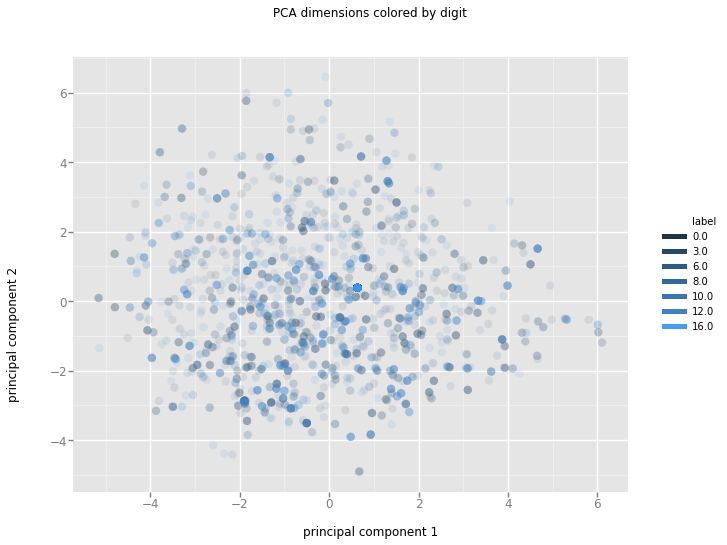

<ggplot: (8770568933531)>

In [78]:
from ggplot import *

df_pca = pd.concat([principalDf,labels],axis = 1)

chart = ggplot( df_pca, aes(x='principal component 1', y='principal component 2', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("PCA dimensions colored by digit")
chart